In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import scipy.stats as ss
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

In [4]:
from sklearn.compose import make_column_selector as selector
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [5]:
df3 = pd.read_csv('./SBAnational_final.CSV', index_col='LoanNr_ChkDgt')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235206 entries, 4466353010 to 9995973006
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   City           235206 non-null  object 
 1   State          235206 non-null  object 
 2   Bank           235206 non-null  object 
 3   BankState      235206 non-null  object 
 4   NAICS          235206 non-null  int64  
 5   NoEmp          235206 non-null  int64  
 6   NewExist       235206 non-null  int64  
 7   FranchiseCode  235206 non-null  int64  
 8   UrbanRural     235206 non-null  int64  
 9   RevLineCr      235206 non-null  object 
 10  LowDoc         235206 non-null  object 
 11  Term           235206 non-null  int64  
 12  CreateJob      235206 non-null  int64  
 13  RetainedJob    235206 non-null  int64  
 14  GrAppv         235206 non-null  float64
 15  MIS_Status     235206 non-null  int64  
dtypes: float64(1), int64(9), object(6)
memory usage: 30.5+ MB


In [6]:
df3['UrbanRural'] = df3['UrbanRural'].astype(str)
df3['NAICS'] = df3['NAICS'].astype(str)
df3['NoEmp'] = df3['NoEmp'].astype(str)
df3['NewExist'] = df3['NewExist'].astype(str)
df3['FranchiseCode'] = df3['FranchiseCode'].astype(str)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235206 entries, 4466353010 to 9995973006
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   City           235206 non-null  object 
 1   State          235206 non-null  object 
 2   Bank           235206 non-null  object 
 3   BankState      235206 non-null  object 
 4   NAICS          235206 non-null  object 
 5   NoEmp          235206 non-null  object 
 6   NewExist       235206 non-null  object 
 7   FranchiseCode  235206 non-null  object 
 8   UrbanRural     235206 non-null  object 
 9   RevLineCr      235206 non-null  object 
 10  LowDoc         235206 non-null  object 
 11  Term           235206 non-null  int64  
 12  CreateJob      235206 non-null  int64  
 13  RetainedJob    235206 non-null  int64  
 14  GrAppv         235206 non-null  float64
 15  MIS_Status     235206 non-null  int64  
dtypes: float64(1), int64(4), object(11)
memory usage: 30.5+ MB


In [7]:
columns_to_encode = ['City','State','Bank','BankState','NAICS', 'NoEmp', 'NewExist', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc']
columns_to_scale  = ['Term', 'CreateJob', 'RetainedJob', 'GrAppv']
scaler = MinMaxScaler()
ohe    = OneHotEncoder(sparse=False)
scaled_columns  = scaler.fit_transform(df3[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(df3[columns_to_encode])

In [8]:
encoded_columns.shape

(235206, 23464)

In [9]:
test2= SelectKBest(chi2, k=1000)
fit3= test2.fit(encoded_columns, df3['MIS_Status'])
features2=fit3.transform(encoded_columns)
scores = pd.DataFrame(fit3.scores_)

In [10]:
features2.shape

(235206, 1000)

In [11]:
import numpy as np
processed_data = np.concatenate([scaled_columns, features2], axis=1)

In [12]:
print(pd.DataFrame(processed_data).head(1))

   0     1     2         3     4     5     6     7     8     9     ...  994   \
0   0.4   0.0   0.0  0.243615   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   995   996   997   998   999   1000  1001  1002  1003  
0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  

[1 rows x 1004 columns]


# Splitting data , SVM model , accuracy, precision, recall, ROC

In [13]:
from scipy import sparse
X_train, X_test, y_train, y_test = train_test_split(sparse.csr_matrix(processed_data), df3['MIS_Status'], test_size=0.3, random_state=0)

In [14]:
from sklearn.svm import SVC
from sklearn import svm

In [15]:
svm_clf = svm.SVC()

In [16]:
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_pred_svm = svm_clf.predict(X_test)

In [18]:
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm_clf.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.85


In [19]:
confusion_matrix2 = confusion_matrix(y_test, y_pred_svm)
print(confusion_matrix2)

[[31351  3889]
 [ 6830 28492]]


In [20]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85     35240
           1       0.88      0.81      0.84     35322

    accuracy                           0.85     70562
   macro avg       0.85      0.85      0.85     70562
weighted avg       0.85      0.85      0.85     70562



In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
svm_probs= svm_clf.decision_function(X_test)

In [22]:
fpr, tpr, thres = roc_curve(y_test, svm_probs)

In [23]:
svm_roc_auc1 = roc_auc_score(y_test, svm_probs)

In [24]:
svm_roc_auc1

0.9075540606925449

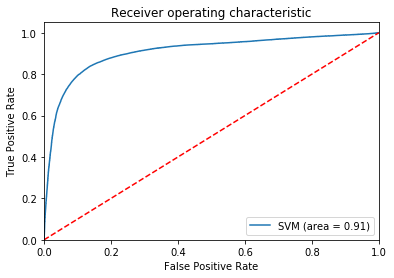

In [25]:
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

# SVM model with cross validation , accuracy, F1 Score, Precision and Recall results 

In [26]:
from sklearn.model_selection import cross_val_score
svm_cv_scores = cross_val_score(svm_clf, sparse.csr_matrix(processed_data), df3['MIS_Status'], cv=5)

In [27]:
svm_cv_scores

array([0.8584669 , 0.86107863, 0.84279671, 0.75808337, 0.80786973])

In [28]:
svm_F1= cross_val_score(svm_clf, sparse.csr_matrix(processed_data), df3['MIS_Status'], cv=5, scoring='f1_macro')
svm_F1

array([0.85839059, 0.86102525, 0.84249876, 0.7529498 , 0.8064683 ])

In [29]:
from sklearn.model_selection import cross_val_predict
svm_predicted = cross_val_predict(svm_clf, sparse.csr_matrix(processed_data), df3['MIS_Status'], cv=5)

In [30]:
svm_cm= confusion_matrix(df3['MIS_Status'], svm_predicted)
svm_cm

array([[104522,  13081],
       [ 27925,  89678]], dtype=int64)

In [31]:
type2_error = svm_cm[1][0]/ (svm_cm[1][0] + svm_cm[1][1])
type2_error

0.2374514255588718

In [32]:
FN=confusion_matrix(df3['MIS_Status'], svm_predicted)[1][0]
FN

27925

In [33]:
svm_cv_avgscores= round(svm_cv_scores.mean(),3)
svm_cv_avgscores

0.826

In [34]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [35]:
svm_precision1= round(precision_score(df3['MIS_Status'], svm_predicted),3)
svm_precision1

0.873

In [36]:
svm_precision2= precision_score(df3['MIS_Status'],svm_predicted,average='macro')
svm_precision2

0.8309315475707886

In [37]:
svm_precision3= precision_score(df3['MIS_Status'],svm_predicted,average='weighted')
svm_precision3

0.8309315475707885

In [38]:
svm_recall1= round(recall_score(df3['MIS_Status'], svm_predicted),3)
svm_recall1

0.763

In [39]:
svm_recall2= recall_score(df3['MIS_Status'],svm_predicted,average='macro')
svm_recall2

0.8256592093739106

In [40]:
svm_recall3= recall_score(df3['MIS_Status'],svm_predicted,average='weighted')
svm_recall3

0.8256592093739106

In [41]:
svm_aucs = cross_val_score(svm_clf, sparse.csr_matrix(processed_data), df3['MIS_Status'], cv=5, scoring='roc_auc') 

In [42]:
svm_aucs

array([0.91987669, 0.92038325, 0.90880575, 0.82878531, 0.87779767])

In [43]:
svm_aucs_avg= round(svm_aucs.mean(),3)
svm_aucs_avg

0.891

In [44]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(df3['MIS_Status'], svm_predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.78916095 0.87270215]
recall: [0.88876984 0.76254857]
fscore: [0.8360088  0.81391528]
support: [117603 117603]


# Classifiers comparison

Accuracy comparison 

In [45]:
acc_data = {'SVM':[0.8584669 , 0.86107863, 0.84279671, 0.75808337, 0.80786973], 'MLP':[0.85298244, 0.86567037, 0.84853638, 0.77447333, 0.82377075], 'LR':[0.82715446, 0.81939159, 0.80100338, 0.74853851, 0.78206246]}
acc_comparison = pd.DataFrame(acc_data)
acc_comparison

,SVM,MLP,LR
0,0.858467,0.852982,0.827154
1,0.861079,0.865670,0.819392
2,0.842797,0.848536,0.801003
3,0.758083,0.774473,0.748539
4,0.807870,0.823771,0.782062


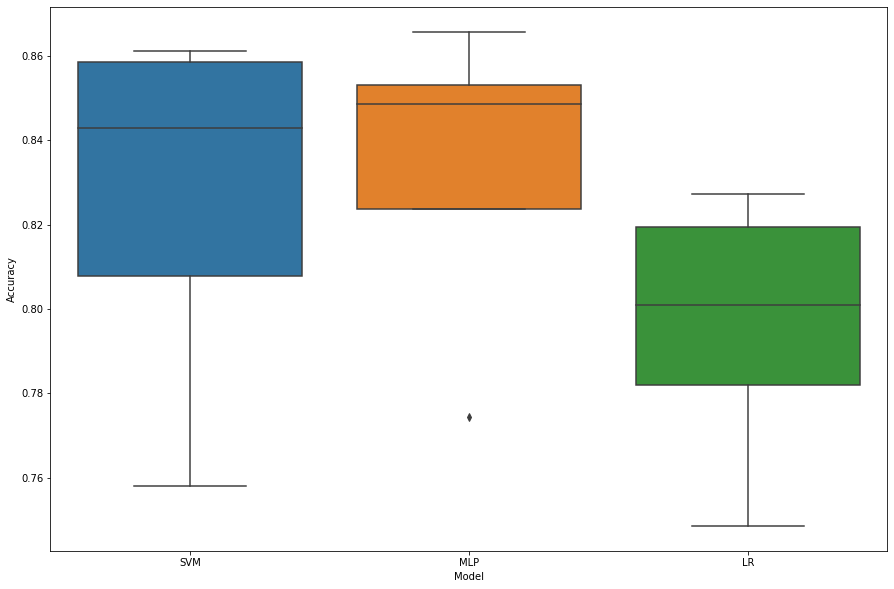

In [46]:
plt.figure(figsize=(15,10))
acc_comparison_long = pd.melt(acc_comparison, var_name="Model", value_name="Accuracy")
sns.boxplot(x = "Model", y="Accuracy", data = acc_comparison_long)

F1 Score Comparison 

In [47]:
F1_data = {'SVM':[0.85839059, 0.86102525, 0.84249876, 0.7529498 , 0.8064683], 'MLP':[0.8642097 , 0.86698229, 0.84753724, 0.76715386, 0.81222581], 'LR':[0.82703096, 0.81932736, 0.80100204, 0.74730697, 0.78199044]}
F1_comparison = pd.DataFrame(F1_data)
F1_comparison

,SVM,MLP,LR
0,0.858391,0.864210,0.827031
1,0.861025,0.866982,0.819327
2,0.842499,0.847537,0.801002
3,0.752950,0.767154,0.747307
4,0.806468,0.812226,0.781990


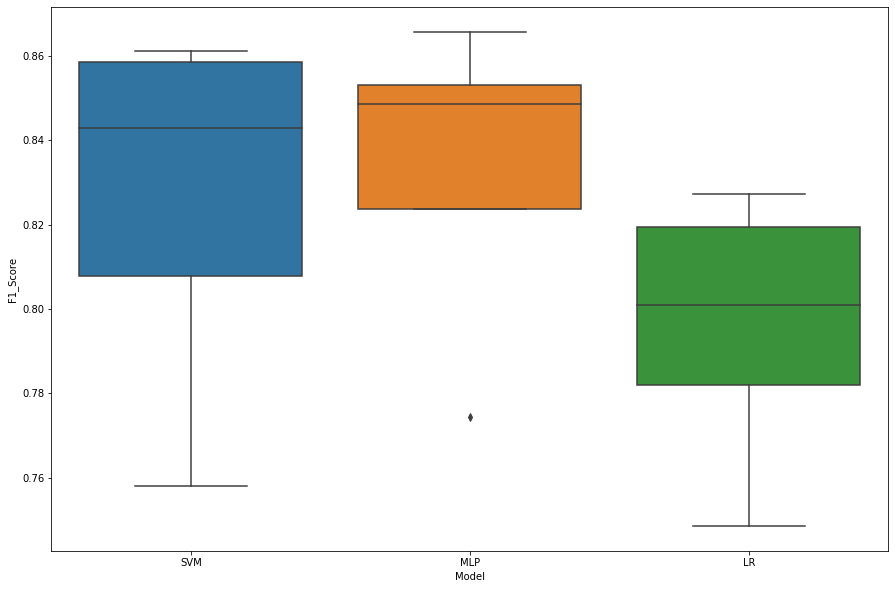

In [48]:
plt.figure(figsize=(15,10))
F1_comparison_long = pd.melt(acc_comparison, var_name="Model", value_name="F1_Score")
sns.boxplot(x = "Model", y="F1_Score", data = F1_comparison_long)

# Type 2 Error, Accuracy and AUC comparison Table

In [52]:
Final_Comp = {'Model':['SVM','MLP','LR'],'TP':['89678','93745','92510'],'TN':['104522','102184','94627'],'FP':['13081','15419','22976'],'FN':['27925','23858','25093'],'Precision':['87.3%','84.9%','80.1%'],'Recall':['76.2%','80.8%','78.7%'], 'Type_2_Error':['23.7%' , '20.2%', '21.3%'],'F1':['81.4%','82.9%','79.4%'], 'ACC':['82.6%', '83.3%', '79.6%'], 'AUC':['89.1%', '89.5%', '85.3%']}
Final_Comparison = pd.DataFrame(Final_Comp)
Final_Comparison

,Model,TP,TN,FP,FN,Precision,Recall,Type_2_Error,F1,ACC,AUC
0,SVM,89678,104522,13081,27925,87.3%,76.2%,23.7%,81.4%,82.6%,89.1%
1,MLP,93745,102184,15419,23858,84.9%,80.8%,20.2%,82.9%,83.3%,89.5%
2,LR,92510,94627,22976,25093,80.1%,78.7%,21.3%,79.4%,79.6%,85.3%
